In [2]:
##Importing libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
##Reading dataset

dataset = pd.read_csv("https://raw.githubusercontent.com/Gabriel-Lyra/adult_census_income_project/master/adult.csv")

In [4]:
##Peeking at data

dataset.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [5]:
##Looking at columns and entries number + types

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education.num     32561 non-null int64
marital.status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital.gain      32561 non-null int64
capital.loss      32561 non-null int64
hours.per.week    32561 non-null int64
native.country    32561 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
##Cleaning bad entries

dataset[dataset == '?'] = np.nan

In [7]:
##Confirming cleaning and looking at new numbers

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         30725 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education.num     32561 non-null int64
marital.status    32561 non-null object
occupation        30718 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital.gain      32561 non-null int64
capital.loss      32561 non-null int64
hours.per.week    32561 non-null int64
native.country    31978 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [8]:
##Confirming again

dataset.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [9]:
##Changing objects to categories

dataset['workclass'] = dataset['workclass'].astype('category')
dataset['education'] = dataset['education'].astype('category')
dataset['marital.status'] = dataset['marital.status'].astype('category')
dataset['occupation'] = dataset['occupation'].astype('category')
dataset['relationship'] = dataset['relationship'].astype('category')
dataset['race'] = dataset['race'].astype('category')
dataset['sex'] = dataset['sex'].astype('category')
dataset['native.country'] = dataset['native.country'].astype('category')
dataset['income'] = dataset['income'].astype('category')

In [10]:
##Confirming change

dataset.dtypes

age                  int64
workclass         category
fnlwgt               int64
education         category
education.num        int64
marital.status    category
occupation        category
relationship      category
race              category
sex               category
capital.gain         int64
capital.loss         int64
hours.per.week       int64
native.country    category
income            category
dtype: object

In [11]:
##summarize tendencies, dispersion and shape of a dataset’s distribution

dataset.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


From here foward vizualizations were made to better understand the dataset variables.

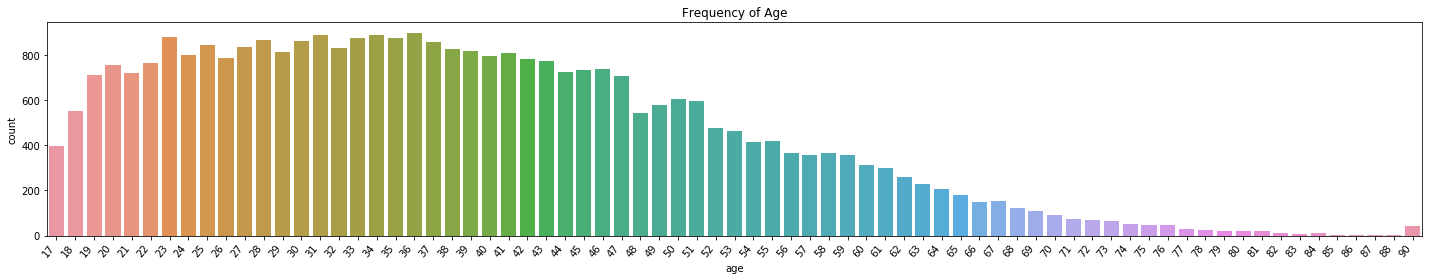

In [12]:
##Plotting age

plt.figure(figsize=(20,4))

ax = sns.countplot(dataset['age'])

ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha="right")
ax.set_title('Frequency of Age')
plt.tight_layout()

Text(0.5, 1.0, 'Frequency of Hours per Week')

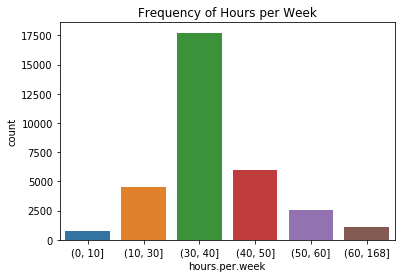

In [13]:
##Plotting Hours per week distribution

sns.countplot(pd.cut(dataset['hours.per.week'], [0,10,30,40,50,60,168])).set_title('Frequency of Hours per Week')

Text(0.5, 1.0, 'Frequency of Sex')

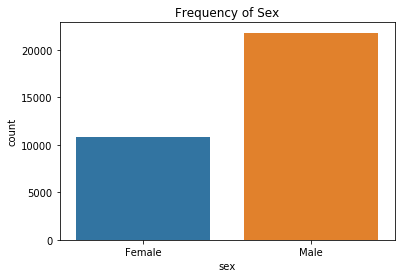

In [14]:
##Plotting Sex distribution

sns.countplot(dataset['sex'],label="Count").set_title('Frequency of Sex')

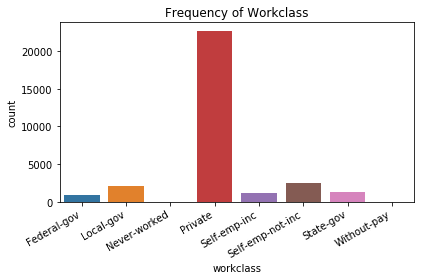

In [15]:
##Plotting Workclass distribution

ax = sns.countplot(dataset['workclass'])

ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right")
ax.set_title('Frequency of Workclass')
plt.tight_layout()

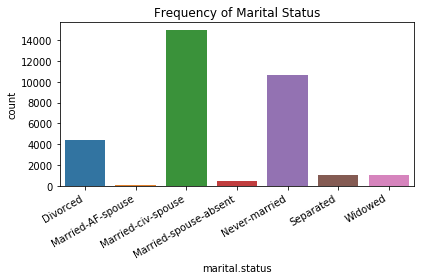

In [16]:
##Plotting Marital Status distribution

ax = sns.countplot(dataset['marital.status'])

ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right")
ax.set_title('Frequency of Marital Status')
plt.tight_layout()

[Text(0, 0.5, 'Percent')]

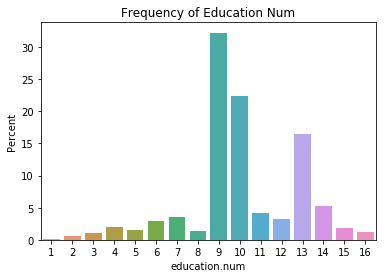

In [17]:
##Plotting Education (using Education.num) distribution

ax = sns.barplot(x="education.num", y="education.num", data=dataset, estimator=lambda x: len(x) / len(dataset) * 100)
ax.set_title('Frequency of Education Num')
ax.set(ylabel="Percent")

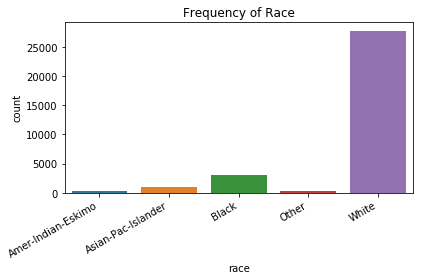

In [18]:
##Plotting Race distribution

ax = sns.countplot(dataset['race'])

ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right")
ax.set_title('Frequency of Race')
plt.tight_layout()

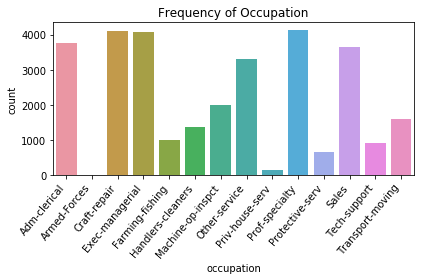

In [19]:
##Plotting Occupation distribution

ax = sns.countplot(dataset['occupation'])

ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha="right")
ax.set_title('Frequency of Occupation')
plt.tight_layout()

In [20]:
##Mapping income as a boolean

dataset['income']=dataset['income'].map({'<=50K': 0, '>50K': 1, '<=50K.': 0, '>50K.': 1})

In [21]:
##Grouping numeric features and categorical features

numeric_features = ['age','fnlwgt','education.num','capital.gain','capital.loss','hours.per.week','income']
cat_features = ['workclass','education','marital.status', 'occupation', 'relationship', 'race', 'sex', 'native']

Text(0.5, 1.0, 'Frequency of Income')

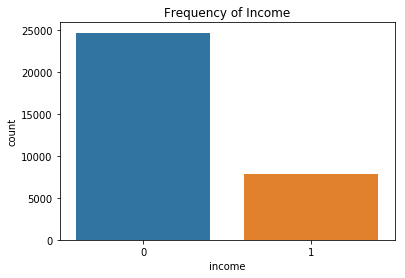

In [22]:
####Plotting Income distribution

sns.countplot(dataset['income'],label="Count").set_title('Frequency of Income')

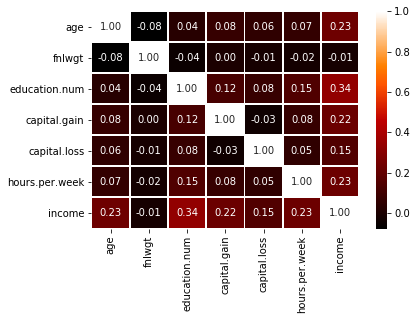

In [23]:
##Looking at numeric features correlations, here we are especially interested in correlations with income

sns.heatmap(dataset[numeric_features].corr(),annot=True, fmt = ".2f", linewidth = 1 , cmap="gist_heat")

From here on foward we will look at the correlations between income and other variables.

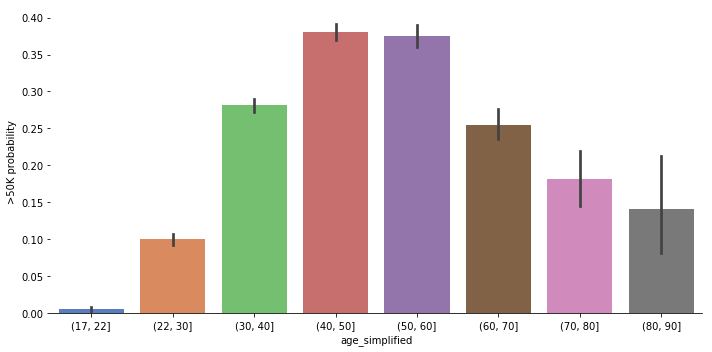

In [103]:
##Plotting Age and Income correlations: Here we learn that workers reach the >50K probability apex between 40 to 60 years.

dataset['age_simplified'] = pd.cut(dataset['age'], [17,22,30,40,50,60,70,80,90])

g = sns.factorplot(x="age_simplified",y="income",data=dataset,kind="bar",aspect  = 2,palette = "muted")
g.despine(left=True)
g = g.set_ylabels(">50K probability")

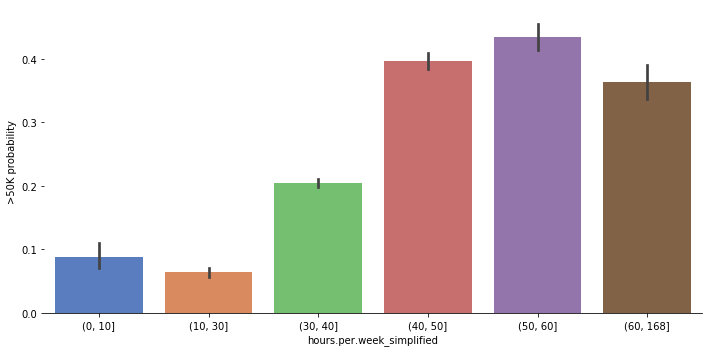

In [104]:
##Plotting Hours per week and Income correlations: 
##Expectedly, those who work overtime have higher probability of being payed >50K than those who don't (by quite a margin).
##Unexpectedly, the range 50-60 has little improvement compared to 40-50 and working too much lowers the >50K probability.

dataset['hours.per.week_simplified'] = pd.cut(dataset['hours.per.week'], [0,10,30,40,50,60,168])

g = sns.factorplot(x="hours.per.week_simplified",y="income",data=dataset,kind="bar",aspect  = 2,palette = "muted")
g.despine(left=True)
g = g.set_ylabels(">50K probability")

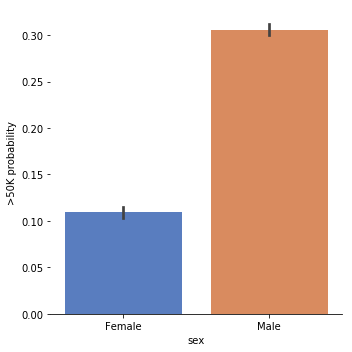

In [105]:
##Plotting Sex and Income correlations: 
##Surprisingly (or perhaps not, especially when taking into account this is 1994 data), men have higher chances at having
##higher salaries compared to women. If comapared to newer datasets this might serve as indication for more or less equality.

g = sns.factorplot(x="sex",y="income",data=dataset,kind="bar",aspect  = 1,palette = "muted")
g.despine(left=True)
g = g.set_ylabels(">50K probability")

30725

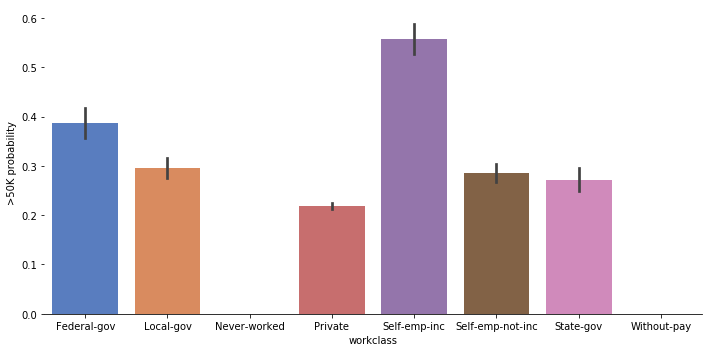

In [27]:
##Plotting Worklass and Income correlations:
##Interesting to see such graph, one would think most people would gravitate towards where they are more likely to have
##greater profity, but here we notice that most o the population is in the group with worst* probability of achiving >50K.
## *(ignoring Never-worked and Without-pay)

g = sns.factorplot(x="workclass",y="income",data=dataset,kind="bar",aspect  = 2,palette = "muted")
g.despine(left=True)
g = g.set_ylabels(">50K probability")

dataset.workclass.count()

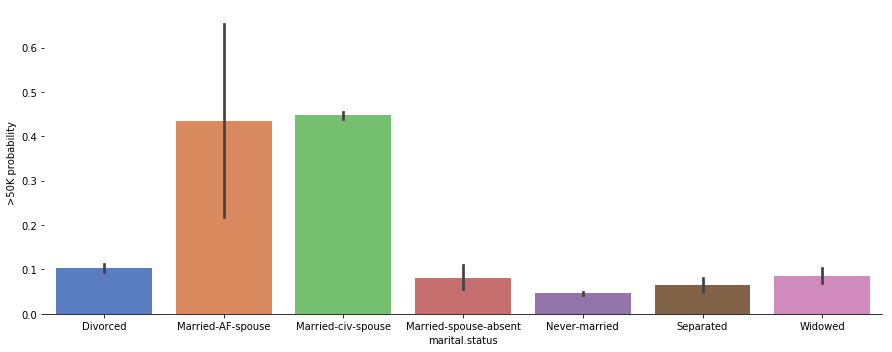

In [107]:
##Plotting Marital status and Income correlations:
##I can't explain this. Maybe when the reserch was done the reserchers put together wife and husband salaries??

g = sns.factorplot(x="marital.status",y="income",data=dataset,kind="bar",aspect  = 2.5,palette = "muted")
g.despine(left=True)
g = g.set_ylabels(">50K probability")

In [108]:
##edu_num = [1,      2,         3,        4,         5,     6,      7,      8,      9,         10,             11,          12,           13,          14,        15,            16]
##edu =    ["none", "1st-4th", "5th-6th", "7th-8th", "9th", "10th", "11th", "12th", "HS-grad", "Some-college", "Assoc-voc", "Assoc-acdm", "Bachelors", "Masters", "Prof-school", "Doctorate"]

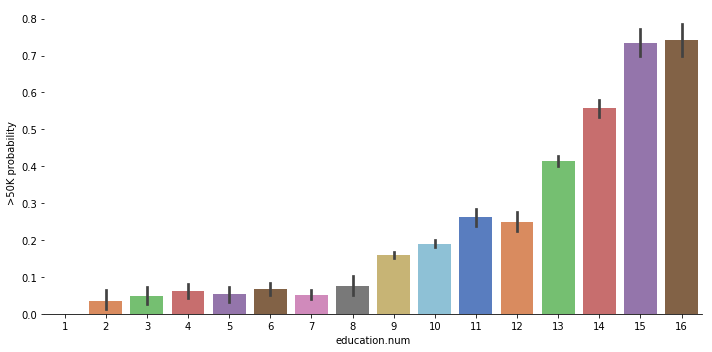

In [109]:
##Plotting Education and Income correlations:
##As expected, the higher someone's education the higher their chances of achiving a >50K salary.

g = sns.factorplot(x="education.num",y="income",data=dataset,kind="bar",aspect  = 2,palette = "muted")
g.despine(left=True)
g = g.set_ylabels(">50K probability")

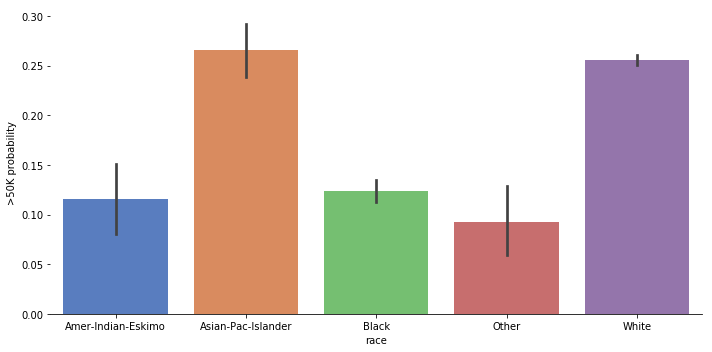

In [110]:
##Plotting Race and Income correlations:
##Again, if comapared to newer datasets, this might serve as indication for more or less equality.

g = sns.factorplot(x="race",y="income",data=dataset,kind="bar",aspect  = 2,palette = "muted")
g.despine(left=True)
g = g.set_ylabels(">50K probability")

"In the US, public schools are funded by state, local, and federal governments. This funding is reliant on income and property
taxes, which poses a threat to poorer areas of the country and causes funding disparities."

https://www.globalcitizen.org/en/content/cost-of-education-in-us/

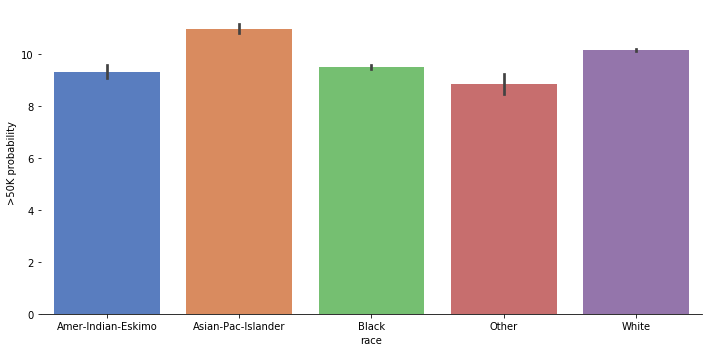

In [111]:
##Plotting Race and Education correlations:
##Here I wondered what might have caused disparity in the last graph. From the Knowledge on the last markdown I wondered
##if education played a role here.

g = sns.factorplot(x="race",y="education.num",data=dataset,kind="bar",aspect  = 2,palette = "muted")
g.despine(left=True)
g = g.set_ylabels(">50K probability")

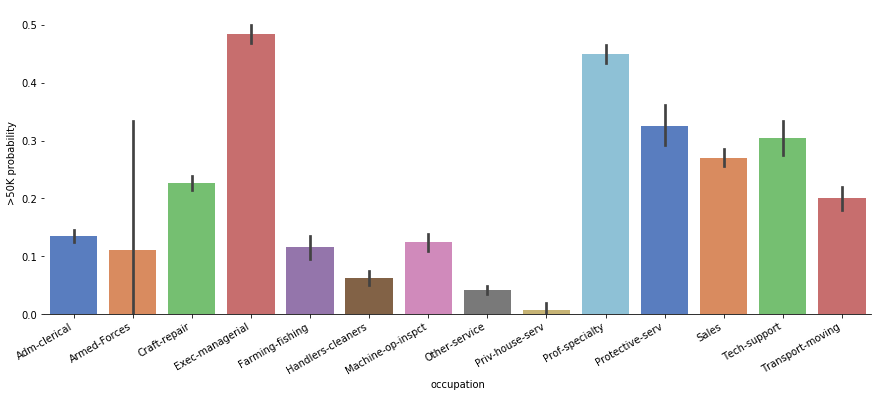

In [112]:
g = sns.factorplot(x="occupation",y="income",data=dataset,kind="bar",aspect  = 2.5,palette = "muted")
g.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right")
g.despine(left=True)
g = g.set_ylabels(">50K probability")

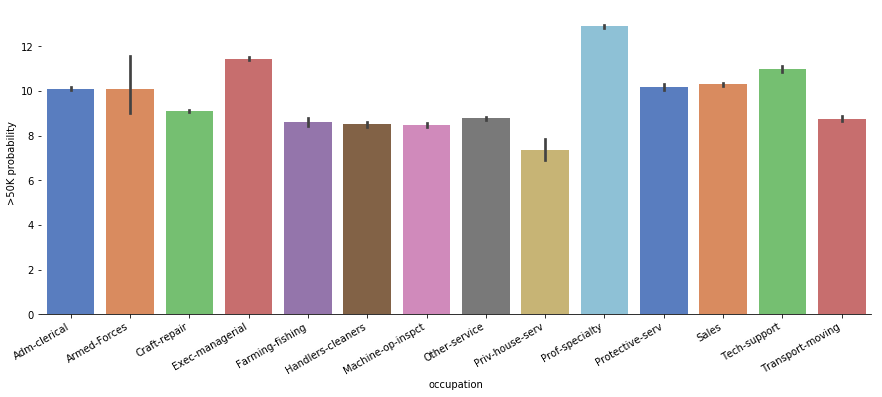

In [113]:
g = sns.factorplot(x="occupation",y="education.num",data=dataset,kind="bar",aspect  = 2.5,palette = "muted")
g.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right")
g.despine(left=True)
g = g.set_ylabels(">50K probability")